In [21]:
import pandas as pd
import numpy as np

In [22]:
df = pd.read_csv('Titanic Dataset.csv')

In [23]:
df.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.00,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1,1,"Allison, Master. Hudson Trevor",male,0.92,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1,0,"Allison, Miss. Helen Loraine",female,2.00,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.00,1,2,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.00,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"


In [24]:
df.isnull()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,False,False,False,False,False,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,False,False,False,False,False,False,False,True,False
2,False,False,False,False,False,False,False,False,False,False,False,True,True,False
3,False,False,False,False,False,False,False,False,False,False,False,True,False,False
4,False,False,False,False,False,False,False,False,False,False,False,True,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1304,False,False,False,False,False,False,False,False,False,True,False,True,False,True
1305,False,False,False,False,True,False,False,False,False,True,False,True,True,True
1306,False,False,False,False,False,False,False,False,False,True,False,True,False,True
1307,False,False,False,False,False,False,False,False,False,True,False,True,True,True


In [25]:
df.tail()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
1304,3,0,"Zabour, Miss. Hileni",female,14.5,1,0,2665,14.4542,NaN,C,NaN,328.0,NaN
1305,3,0,"Zabour, Miss. Thamine",female,NaN,1,0,2665,14.4542,NaN,C,NaN,NaN,NaN
1306,3,0,"Zakarian, Mr. Mapriededer",male,26.5,0,0,2656,7.2250,NaN,C,NaN,304.0,NaN
1307,3,0,"Zakarian, Mr. Ortin",male,27.0,0,0,2670,7.2250,NaN,C,NaN,NaN,NaN
1308,3,0,"Zimmerman, Mr. Leo",male,29.0,0,0,315082,7.8750,NaN,S,NaN,NaN,NaN


In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   pclass     1309 non-null   int64  
 1   survived   1309 non-null   int64  
 2   name       1309 non-null   object 
 3   sex        1309 non-null   object 
 4   age        1046 non-null   float64
 5   sibsp      1309 non-null   int64  
 6   parch      1309 non-null   int64  
 7   ticket     1309 non-null   object 
 8   fare       1308 non-null   float64
 9   cabin      295 non-null    object 
 10  embarked   1307 non-null   object 
 11  boat       486 non-null    object 
 12  body       121 non-null    float64
 13  home.dest  745 non-null    object 
dtypes: float64(3), int64(4), object(7)
memory usage: 143.3+ KB


In [27]:
print(df.isnull().sum())

pclass          0
survived        0
name            0
sex             0
age           263
sibsp           0
parch           0
ticket          0
fare            1
cabin        1014
embarked        2
boat          823
body         1188
home.dest     564
dtype: int64


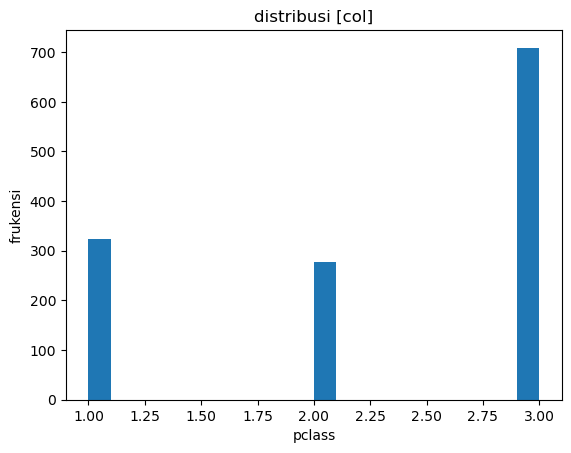

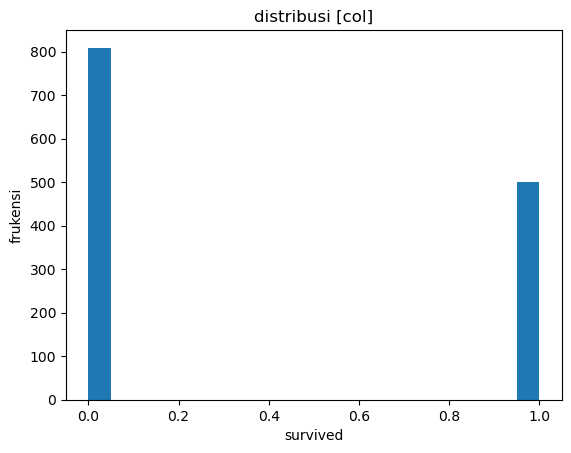

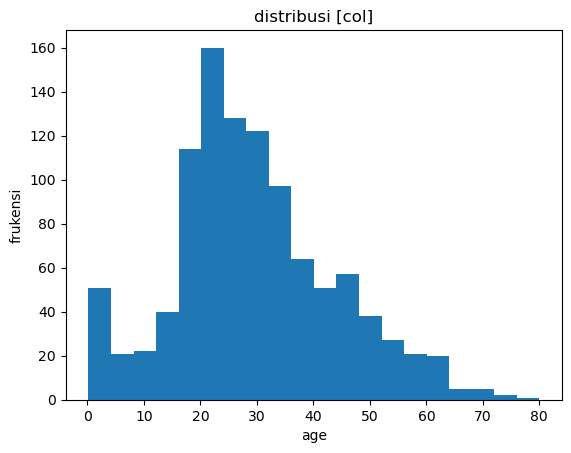

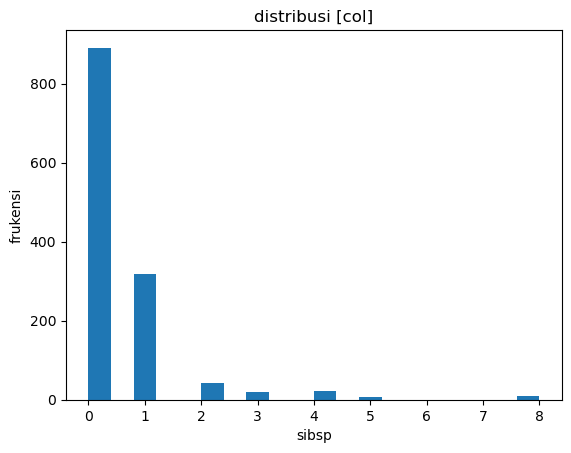

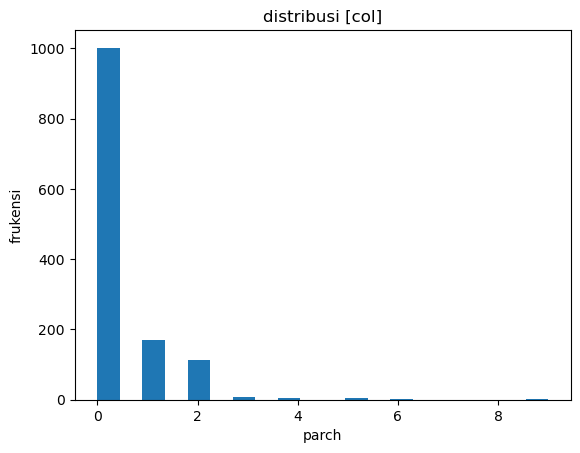

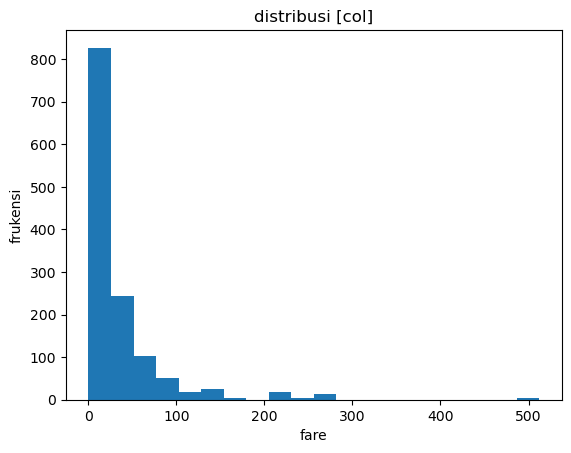

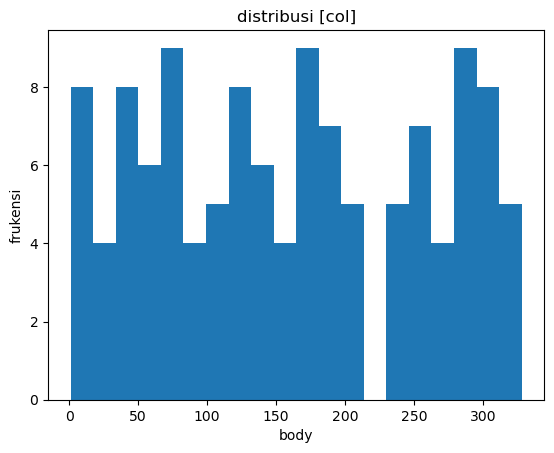

In [28]:
#--- I DA Distribusi kolom numerik ---
import matplotlib.pyplot as plt

#ambil semua kolom numerik
num_cols = df.select_dtypes(include=['float64','int64']).columns

for col in num_cols:
    plt.figure()
    plt.hist(df[col], bins=20)
    plt.title("distribusi [col]")
    plt.xlabel(col)
    plt.ylabel("frukensi")
    plt.show()

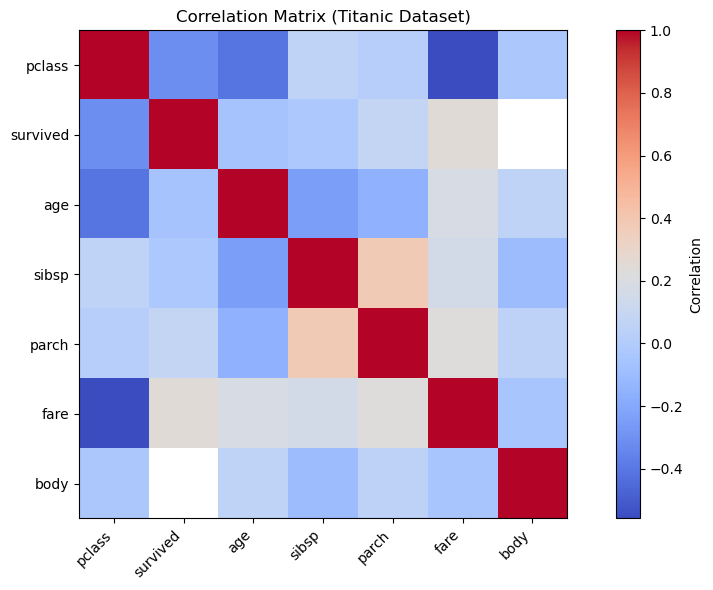

In [29]:
# hitung korelasi antar fitur
corr = df.corr(numeric_only=True)

# tampilkan matriks korelasi sebagai heatmap
plt.figure(figsize=(10, 6))
plt.imshow(corr, cmap='coolwarm', interpolation='nearest')
plt.colorbar(label='Correlation')
plt.xticks(range(len(corr.columns)), corr.columns, rotation=45, ha='right')
plt.yticks(range(len(corr.columns)), corr.columns)
plt.title("Correlation Matrix (Titanic Dataset)")
plt.tight_layout()
plt.show()

In [41]:
df.corr(numeric_only=True)['survived'].sort_values(ascending=False)

survived      1.000000
sex           0.528693
fare          0.244414
embarked_C    0.182123
parch         0.082660
embarked_Q   -0.016071
sibsp        -0.027825
age          -0.043817
embarked_S   -0.150542
pclass       -0.312469
Name: survived, dtype: float64

In [30]:
df = df.drop(columns=['cabin', 'boat', 'body', 'home.dest'])


In [31]:
df['age'].fillna(df['age'].median(), inplace=True)
df['fare'].fillna(df['fare'].median(), inplace=True)
df['embarked'].fillna(df['embarked'].mode()[0], inplace=True)


C:\Users\IPUN\AppData\Local\Temp\ipykernel_22128\4259794617.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['age'].fillna(df['age'].median(), inplace=True)
C:\Users\IPUN\AppData\Local\Temp\ipykernel_22128\4259794617.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For exa

In [1]:
# === EDA: Komposisi Kolom Kategorik ===
cat_cols = df.select_dtypes(include=['object', 'category']).columns

for col in cat_cols:
    plt.figure()
    df[col].value_counts().plot(kind='bar')
    plt.title(f"Komposisi {col}")
    plt.xlabel(col)
    plt.ylabel("Jumlah")
    plt.show()

NameError: name 'df' is not defined

In [32]:
print(df.isnull().sum())


pclass      0
survived    0
name        0
sex         0
age         0
sibsp       0
parch       0
ticket      0
fare        0
embarked    0
dtype: int64


In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   pclass    1309 non-null   int64  
 1   survived  1309 non-null   int64  
 2   name      1309 non-null   object 
 3   sex       1309 non-null   object 
 4   age       1309 non-null   float64
 5   sibsp     1309 non-null   int64  
 6   parch     1309 non-null   int64  
 7   ticket    1309 non-null   object 
 8   fare      1309 non-null   float64
 9   embarked  1309 non-null   object 
dtypes: float64(2), int64(4), object(4)
memory usage: 102.4+ KB


In [34]:
import matplotlib.pyplot as plt

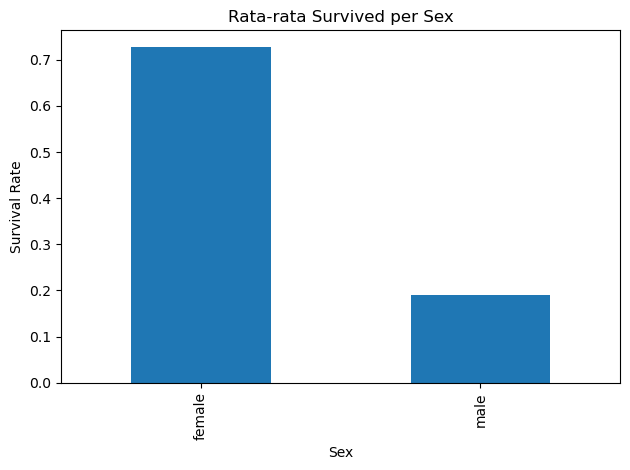

In [35]:
ct = df.groupby('sex')['survived'].mean()  # rate selamat
plt.figure()
ct.plot(kind='bar')
plt.title('Rata-rata Survived per Sex')
plt.xlabel('Sex')
plt.ylabel('Survival Rate')
plt.tight_layout()
plt.show()

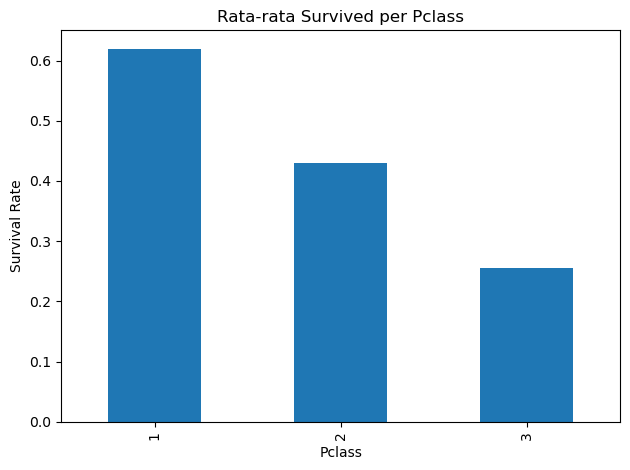

In [36]:
ct2 = df.groupby('pclass')['survived'].mean()
plt.figure()
ct2.plot(kind='bar')
plt.title('Rata-rata Survived per Pclass')
plt.xlabel('Pclass')
plt.ylabel('Survival Rate')
plt.tight_layout()
plt.show()

In [37]:
df['sex'] = df['sex'].map({'male': 0, 'female': 1})


In [38]:
df = pd.get_dummies(df, columns=['embarked'])


In [39]:
print(df.dtypes)


pclass          int64
survived        int64
name           object
sex             int64
age           float64
sibsp           int64
parch           int64
ticket         object
fare          float64
embarked_C       bool
embarked_Q       bool
embarked_S       bool
dtype: object


In [40]:
print(df.head(),df.tail())

   pclass  survived                                             name  sex  \
0       1         1                    Allen, Miss. Elisabeth Walton    1   
1       1         1                   Allison, Master. Hudson Trevor    0   
2       1         0                     Allison, Miss. Helen Loraine    1   
3       1         0             Allison, Mr. Hudson Joshua Creighton    0   
4       1         0  Allison, Mrs. Hudson J C (Bessie Waldo Daniels)    1   

     age  sibsp  parch  ticket      fare  embarked_C  embarked_Q  embarked_S  
0  29.00      0      0   24160  211.3375       False       False        True  
1   0.92      1      2  113781  151.5500       False       False        True  
2   2.00      1      2  113781  151.5500       False       False        True  
3  30.00      1      2  113781  151.5500       False       False        True  
4  25.00      1      2  113781  151.5500       False       False        True         pclass  survived                       name  sex   age  s